# Ekstraktor Waveform MiniSEED

## Fungsi
Alat ini:
1. Membaca file MiniSEED gabungan
2. Mengekstrak waveform komponen vertikal
3. Menampilkan plot semua stasiun yang tersedia
4. Memungkinkan pemilihan stasiun untuk diekstrak

## Petunjuk Penggunaan
1. Jalankan sel di bawah ini
2. Saat diminta, tempelkan path lengkap ke file MiniSEED gabungan Anda
   - Contoh: `C:/data/combined_waveforms.mseed`
3. Skrip akan menampilkan semua stasiun dengan komponen vertikal
4. Pilih stasiun dengan memasukkan nomornya (dimulai dari 0), dipisahkan koma
   - Contoh: `0, 2, 5`

## Output
- Mengembalikan waveform yang terekstrak untuk stasiun terpilih
- Menyimpan plot sebagai file DAT di direktori yang sama

## Catatan
- Hanya memproses komponen vertikal (saluran Z)
- Memerlukan library Obspy terinstal

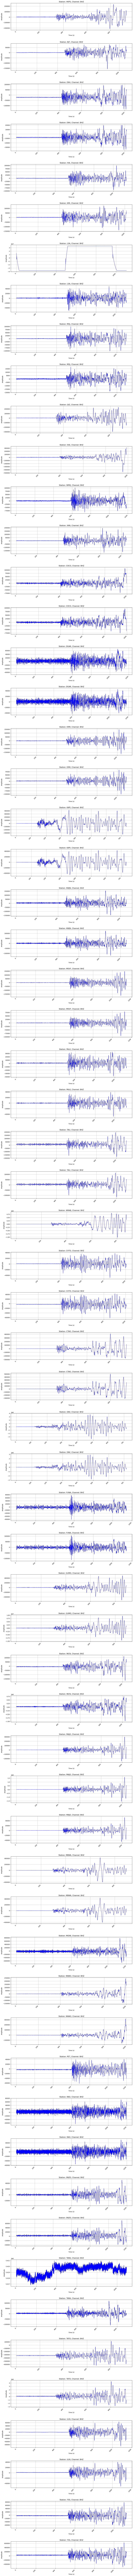

File saved: HKPS_vertical.dat
File saved: BJT_vertical.dat
File saved: ENH_vertical.dat
File saved: HIA_vertical.dat
File saved: KMI_vertical.dat
File saved: LSA_vertical.dat
File saved: MDJ_vertical.dat
File saved: QIZ_vertical.dat
File saved: SSE_vertical.dat
File saved: WMQ_vertical.dat
File saved: XAN_vertical.dat
File saved: COCO_vertical.dat
File saved: DGAR_vertical.dat
File saved: ERM_vertical.dat
File saved: KAPI_vertical.dat
File saved: KWJN_vertical.dat
File saved: MSVF_vertical.dat
File saved: PALK_vertical.dat
File saved: TAU_vertical.dat
File saved: WRAB_vertical.dat
File saved: CHTO_vertical.dat
File saved: CTAO_vertical.dat
File saved: DAV_vertical.dat
File saved: FUNA_vertical.dat
File saved: GUMO_vertical.dat
File saved: INCN_vertical.dat
File saved: MAJO_vertical.dat
File saved: MBWA_vertical.dat
File saved: MIDW_vertical.dat
File saved: NWAO_vertical.dat
File saved: PET_vertical.dat
File saved: RAO_vertical.dat
File saved: TARA_vertical.dat
File saved: TARA_vertical

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read

# Replace with the path to your combined MiniSEED file
file_mseed = input("Enter the path to the combined MiniSEED file: ")

# Read the combined MiniSEED file
st = read(file_mseed)

# Plot waveforms for vertical components and collect user input
vertical_components = []

# Determine the number of vertical components
for tr in st:
    if tr.stats.channel.endswith('Z'):
        vertical_components.append(tr)

# Calculate the number of rows needed for the subplots
num_plots = len(vertical_components)
num_cols = 1  # Single column layout

# Create a figure with enough vertical space
plt.figure(figsize=(15, 5 * num_plots))

for i, tr in enumerate(vertical_components):
    # Plot the waveform
    plt.subplot(num_plots, num_cols, i + 1)
    time = tr.times()  # Time in seconds
    amplitude = tr.data  # Amplitude data
    plt.plot(time, amplitude, color="b", lw=1)
    plt.xlabel("Time (s)", fontsize=10)
    plt.ylabel("Amplitude", fontsize=10)
    plt.title(f"Station: {tr.stats.station}, Channel: {tr.stats.channel}", fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.5)  # Increase vertical space between plots
plt.show()

# Ask the user which vertical components to save
indices_to_save = input("Enter the indices of the vertical components you want to save (comma-separated, e.g., 0,2): ")
indices_to_save = [int(index.strip()) for index in indices_to_save.split(",")]

# Save the selected vertical components
for index in indices_to_save:
    tr = vertical_components[index]
    filename = f"{tr.stats.station}_vertical.dat"
    time = tr.times()  # Time in seconds
    amplitude = tr.data  # Amplitude data

    # Save the data in .dat format
    np.savetxt(filename, np.column_stack((time, amplitude,amplitude)), fmt="%.6f %6f %6f")
    print(f"File saved: {filename}")

# Alat Pemberian Nama Event

## Tujuan
Menambahkan nama event sebagai prefix pada file .dat untuk:
- Organisasi file yang lebih baik
- Penelusuran data
- Manajemen dataset

## Kapan Digunakan
*Setelah* menyelesaikan phase/group velocity picking pada file .dat

## Petunjuk Penggunaan
1. Jalankan sel di bawah ini
2. Saat diminta:
   - Masukkan path direktori berisi file .dat
     - Contoh: `C:/processed_data/event_123/`
   - Masukkan prefix yang diinginkan (nama event diikuti '-')
     - Contoh: `Java-` atau `Sumatra-2023-`
3. Skrip akan:
   - Menampilkan semua file .dat
   - Mengubah nama dengan prefix
   - Menunjukkan nama sebelum/sesudah

## Contoh Perubahan
Sebelum:
CDisp.T.AAK_vertical.dat

Sesudah (prefix `Java-`):
Java-CDisp.T.AAK_vertical.dat


## Catatan
- Hanya memodifikasi file .dat
- File asli akan ditimpa (buat backup terlebih dahulu)
- Berfungsi untuk semua file dalam direktori

In [1]:
# Add prefix to filename
import os

def add_prefix_to_dat_files(directory, prefix):
    """
    Adds a prefix to all .dat files in the specified directory.
    
    Args:
        directory (str): Path to the directory containing .dat files
        prefix (str): The prefix to add to each filename
    """
    # Get all files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a .dat file
        if filename.endswith('.dat'):
            # Construct new filename with prefix
            new_filename = prefix + filename
            old_path = os.path.join(directory, filename)
            new_path = os.path.join(directory, new_filename)
            
            # Rename the file
            os.rename(old_path, new_path)
            print(f"Renamed: {filename} -> {new_filename}")

if __name__ == "__main__":
    # Get user input for directory and prefix
    target_directory = input("Enter the directory path containing .dat files: ")
    prefix_to_add = input("Enter the prefix to add to filenames: ")
    
    # Verify directory exists
    if not os.path.isdir(target_directory):
        print(f"Error: Directory '{target_directory}' does not exist.")
    else:
        add_prefix_to_dat_files(target_directory, prefix_to_add)
        print("Prefix addition complete!")

Renamed: CDisp.T.AAK_vertical.dat -> Java-CDisp.T.AAK_vertical.dat
Renamed: CDisp.T.BJT_vertical.dat -> Java-CDisp.T.BJT_vertical.dat
Renamed: CDisp.T.CHTO_vertical.dat -> Java-CDisp.T.CHTO_vertical.dat
Renamed: CDisp.T.COCO_vertical.dat -> Java-CDisp.T.COCO_vertical.dat
Renamed: CDisp.T.CTAO_vertical.dat -> Java-CDisp.T.CTAO_vertical.dat
Renamed: CDisp.T.DAV_vertical.dat -> Java-CDisp.T.DAV_vertical.dat
Renamed: CDisp.T.DGAR_vertical.dat -> Java-CDisp.T.DGAR_vertical.dat
Renamed: CDisp.T.ENH_vertical.dat -> Java-CDisp.T.ENH_vertical.dat
Renamed: CDisp.T.ERM_vertical.dat -> Java-CDisp.T.ERM_vertical.dat
Renamed: CDisp.T.GUMO_vertical.dat -> Java-CDisp.T.GUMO_vertical.dat
Renamed: CDisp.T.HIA_vertical.dat -> Java-CDisp.T.HIA_vertical.dat
Renamed: CDisp.T.HKPS_vertical.dat -> Java-CDisp.T.HKPS_vertical.dat
Renamed: CDisp.T.HNR_vertical.dat -> Java-CDisp.T.HNR_vertical.dat
Renamed: CDisp.T.INCN_vertical.dat -> Java-CDisp.T.INCN_vertical.dat
Renamed: CDisp.T.KAPI_vertical.dat -> Java-CDisp

# Penyalin Header

## Tujuan
Menyalin informasi header (metadata) antar file data seismik ketika:
- Setup MATLAB gagal mentransfer koordinat
- Perlu sinkronisasi manual metadata stasiun/event  
- Pemulihan dari kesalahan proses data

## Data yang Disalin
- Koordinat sumber gempa
- Koordinat stasiun rekaman
- Elevasi stasiun
- Kedalaman gempa
- Metadata header lainnya

## Petunjuk Penggunaan  
1. Jalankan sel di bawah ini
2. Saat diminta:
   - **Path Sumber**: Direktori dengan file header yang benar
     - Contoh: `C:/correct_headers/`
   - **Path Target**: Direktori yang perlu pembaruan header
     - Contoh: `C:/processing_output/`
    - **Backup**: Akan diminta apakah ingin melakukan backup dari data yang ada di path target, ketik 'y' jika ya dan 'n' jika tidak

## Logika Pencocokan
File dipasangkan menggunakan identifier stasiun:
Sumber: INCN_vertical.dat → cocok dengan → Target: Java-GDisp.INCN_vertical.dat


## Fitur Keamanan
- Menunjukkan pratinjau perubahan
- Mempertahankan timestamp asli file
- Hanya memodifikasi header (bukan data waveform)

## Kasus Penggunaan Disarankan
- Mengoreksi kesalahan koordinat setelah proses
- Menggabungkan dataset dari sumber berbeda
- Pemeriksaan kontrol kualitas



In [4]:
import os
import re
from datetime import datetime

def extract_identifier(filename):
    """Extract the XXX_vertical or XXXX_vertical portion from filenames"""
    # Matches patterns like:
    # Source: ABC_vertical.dat → "ABC_vertical"
    # Source: ABCD_vertical.dat → "ABCD_vertical"
    # Target: Java-GDisp.ABC_vertical.dat → "ABC_vertical"
    # Target: Java-GDisp.ABCD_vertical.dat → "ABCD_vertical"
    match = re.search(r'(?:.*\.)?([A-Z]{3,4}_[a-z]+)', filename)
    return match.group(1) if match else None

def copy_first_two_lines(source_dir, target_dir):
    """
    Copies first two lines from source .dat files to matching target .dat files.
    Handles both 3-letter and 4-letter identifiers (ABC_vertical, ABCD_vertical).
    """
    # Create mapping of identifiers to source files
    source_map = {}
    source_count = 0
    
    # Process source directory
    for filename in os.listdir(source_dir):
        if filename.endswith('.dat'):
            identifier = extract_identifier(filename)
            if identifier:
                source_map[identifier] = os.path.join(source_dir, filename)
                source_count += 1
                print(f"Found source: {filename} → Identifier: {identifier}")
            else:
                print(f"⚠️ Skipping source file (pattern mismatch): {filename}")
    
    if not source_map:
        print("❌ No valid source files found!")
        return 0
    
    # Process target directory
    modified_count = 0
    target_count = 0
    
    for filename in os.listdir(target_dir):
        if filename.endswith('.dat'):
            target_count += 1
            identifier = extract_identifier(filename)
            if identifier:
                if identifier in source_map:
                    source_path = source_map[identifier]
                    target_path = os.path.join(target_dir, filename)
                    
                    try:
                        # Read source lines
                        with open(source_path, 'r') as src_file:
                            new_lines = [src_file.readline(), src_file.readline()]
                        
                        # Read target content
                        with open(target_path, 'r') as tgt_file:
                            existing_lines = tgt_file.readlines()[2:]
                        
                        # Write combined content
                        with open(target_path, 'w') as tgt_file:
                            tgt_file.writelines(new_lines + existing_lines)
                        
                        print(f"✅ Updated {filename} with header from {os.path.basename(source_path)}")
                        modified_count += 1
                    
                    except Exception as e:
                        print(f"❌ Error processing {filename}: {str(e)}")
                else:
                    print(f"⚠️ No matching source for target: {filename} (identifier: {identifier})")
            else:
                print(f"⚠️ Skipping target file (pattern mismatch): {filename}")
    
    print(f"\n📊 Summary:")
    print(f"- Found {source_count} valid source files")
    print(f"- Processed {target_count} target files")
    print(f"- Updated {modified_count} files")
    print(f"- {target_count - modified_count} files unchanged")
    return modified_count

def create_backup(target_dir):
    """Create timestamped backup of target files"""
    backup_dir = os.path.join(target_dir, f"backup_{datetime.now().strftime('%Y%m%d_%H%M%S')}")
    os.makedirs(backup_dir, exist_ok=True)
    
    backup_count = 0
    for filename in os.listdir(target_dir):
        if filename.endswith('.dat'):
            try:
                src = os.path.join(target_dir, filename)
                dst = os.path.join(backup_dir, filename)
                with open(src, 'rb') as f1, open(dst, 'wb') as f2:
                    f2.write(f1.read())
                backup_count += 1
            except Exception as e:
                print(f"❌ Failed to backup {filename}: {str(e)}")
    
    print(f"📦 Created backup of {backup_count} files in {backup_dir}")
    return backup_count

if __name__ == "__main__":
    print("\n=== DAT File Header Updater ===")
    print("Handles both 3-letter and 4-letter identifiers (ABC_vertical, ABCD_vertical)")
    print("Source files: ABC_vertical.dat or ABCD_vertical.dat")
    print("Target files: Java-GDisp.ABC_vertical.dat or Java-GDisp.ABCD_vertical.dat\n")
    
    source_dir = input("📂 Source directory path: ").strip()
    target_dir = input("📂 Target directory path: ").strip()
    
    if not all(map(os.path.isdir, [source_dir, target_dir])):
        print("❌ Error: Invalid directory path(s)")
        exit(1)
    
    if input("💾 Create backup before modifying? (y/n): ").lower() == 'y':
        create_backup(target_dir)
    
    modified = copy_first_two_lines(source_dir, target_dir)
    print(f"\n🎉 Operation complete. Modified {modified} target files.")


=== DAT File Header Updater ===
Handles both 3-letter and 4-letter identifiers (ABC_vertical, ABCD_vertical)
Source files: ABC_vertical.dat or ABCD_vertical.dat
Target files: Java-GDisp.ABC_vertical.dat or Java-GDisp.ABCD_vertical.dat

📦 Created backup of 68 files in C:\Users\Bowo\OneDrive\Kuliah\Semester 8\Gelombang Permukaan\Tubes\My part\Java Picked Copy\backup_20250424_200723
Found source: AAK_vertical.dat → Identifier: AAK_vertical
Found source: BJT_vertical.dat → Identifier: BJT_vertical
Found source: CHTO_vertical.dat → Identifier: CHTO_vertical
Found source: COCO_vertical.dat → Identifier: COCO_vertical
Found source: CTAO_vertical.dat → Identifier: CTAO_vertical
Found source: DAV_vertical.dat → Identifier: DAV_vertical
Found source: DGAR_vertical.dat → Identifier: DGAR_vertical
Found source: ENH_vertical.dat → Identifier: ENH_vertical
Found source: ERM_vertical.dat → Identifier: ERM_vertical
Found source: GUMO_vertical.dat → Identifier: GUMO_vertical
Found source: HIA_vertical

# Dokumentasi Pembersih Data QC untuk Hasil Picking Seismik

## Fungsi Utama
Skrip ini dirancang untuk melakukan Quality Control (QC) otomatis pada file `.dat` setelah proses picking fase/grup velocity di MATLAB dengan:

1. **Pembersihan Nilai Nol**:
   - Menghapus baris yang mengandung nilai nol atau mendekati nol
   - Presisi deteksi bisa disesuaikan (default: `1e-6`)

2. **Penyederhanaan Kolom**:
   - Menghapus kolom ke-3 dan ke-4 secara otomatis
   - Mempertahankan kolom penting untuk analisis tomografi

3. **Proteksi Data**:
   - Tidak mengubah 2 baris pertama (header informasi)
   - Opsi backup data asli sebelum pemrosesan

## Cara Penggunaan

### Langkah 1: Menjalankan Skrip
1. Buka Jupyter Notebook yang berisi skrip ini
2. Jalankan cell yang berisi kode QC cleaner

### Langkah 2: Input Parameter
1. **Path Direktori**:
   - Masukkan alamat folder tempat file `.dat` disimpan
   - Contoh: `C:/data/hasil_picking/` atau `/home/user/seismic_data`

2. **Opsi Backup**:
   - Ketik `y` jika ingin membuat salinan backup
   - Ketik `n` jika tidak membutuhkan backup

### Langkah 3: Proses Otomatis
Skrip akan:
1. Memindai semua file `.dat` di direktori
2. Menampilkan log pemrosesan
3. Menyimpan hasil bersih di direktori yang sama

## Fitur Keamanan
- **Backup Otomatis**:
  - Data asli disalin ke folder `backup_[tanggal]`
  - Format: `backup_20240515` (tahun-bulan-tanggal)

- **Proteksi Header**:
  - Baris 1-2 (informasi koordinat dan parameter) tidak diubah
  - Hanya memodifikasi bagian data waveform

- **Threshold Disesuaikan**:
  - Nilai ambang nol bisa diubah sesuai kebutuhan
  - Untuk data sangat presisi, bisa diperketat menjadi `1e-8`

## Output yang Dihasilkan
- File dengan format nama sama
- Struktur file:
[Baris 1-2: Header asli]
[Baris 3+: Data bersih tanpa kolom 3-4 dan nilai nol]

- Log terminal akan menampilkan:
[Nama file]: 15 baris nol dihapus
[Nama file]: Kolom 3-4 dihapus


## Catatan Penting
1. Pastikan file sudah selesai diproses di MATLAB sebelum di-QC
2. Untuk data dengan format khusus, sesuaikan threshold nilai nol
3. Backup sangat disarankan untuk menghindari kehilangan data
4. Skrip hanya bekerja untuk file `.dat` dengan struktur kolom standar

## Contoh Kasus Penggunaan
1. Koreksi otomatis setelah picking rapat gelombang
2. Pembersihan data sebelum inversi tomografi
3. Standarisasi format file untuk analisis batch

In [1]:
import os
import re
from datetime import datetime

def is_approximately_zero(value):
    """Check if a string value represents approximately zero"""
    try:
        float_val = float(value)
        return abs(float_val) < 1e-6  # Adjust threshold as needed
    except ValueError:
        return False

def remove_columns_and_zero_lines(filepath):
    """
    Process a .dat file to:
    1. Keep first two lines intact
    2. Remove 3rd and 4th columns from remaining lines
    3. Delete lines containing any approximately zero values
    """
    try:
        with open(filepath, 'r') as f:
            lines = f.readlines()
        
        # Keep first two lines intact
        header = lines[:2]
        
        # Process remaining lines
        processed_lines = []
        lines_removed = 0
        
        for line in lines[2:]:
            line = line.strip()
            if not line:  # Skip empty lines
                continue
                
            # Split on whitespace (handles both tabs and spaces)
            columns = re.split(r'\s+', line)
            
            # Check for any zero values in the line
            has_zero = any(is_approximately_zero(val) for val in columns)
            if has_zero:
                lines_removed += 1
                continue
            
            # Keep columns 1, 2, and 5+ (remove 3 and 4)
            if len(columns) >= 4:
                new_columns = columns[:2] + columns[4:]
                processed_lines.append(' '.join(new_columns) + '\n')
            else:
                # If line doesn't have enough columns, keep as-is
                processed_lines.append(line + '\n')
        
        # Write back to file
        with open(filepath, 'w') as f:
            f.writelines(header + processed_lines)
        
        return True, lines_removed
    
    except Exception as e:
        print(f"❌ Error processing {os.path.basename(filepath)}: {str(e)}")
        return False, 0

def process_directory(directory):
    """Process all .dat files in a directory"""
    processed_count = 0
    total_lines_removed = 0
    
    for filename in os.listdir(directory):
        if filename.endswith('.dat'):
            filepath = os.path.join(directory, filename)
            success, lines_removed = remove_columns_and_zero_lines(filepath)
            if success:
                print(f"✅ Processed {filename} (removed {lines_removed} lines)")
                processed_count += 1
                total_lines_removed += lines_removed
    
    return processed_count, total_lines_removed

def create_backup(directory):
    """Create timestamped backup of files"""
    backup_dir = os.path.join(directory, f"backup_{datetime.now().strftime('%Y%m%d_%H%M%S')}")
    os.makedirs(backup_dir, exist_ok=True)
    
    backup_count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.dat'):
            try:
                src = os.path.join(directory, filename)
                dst = os.path.join(backup_dir, filename)
                with open(src, 'rb') as f1, open(dst, 'wb') as f2:
                    f2.write(f1.read())
                backup_count += 1
            except Exception as e:
                print(f"❌ Failed to backup {filename}: {str(e)}")
    
    print(f"📦 Created backup of {backup_count} files in {backup_dir}")
    return backup_dir

if __name__ == "__main__":
    print("\n=== DAT File Processor ===")
    print("1. Preserves first two lines")
    print("2. Removes 3rd and 4th columns")
    print("3. Deletes lines with any zero values (0, 0.0, 0.00, etc.)\n")
    
    target_dir = input("📂 Directory containing .dat files: ").strip()
    
    if not os.path.isdir(target_dir):
        print("❌ Error: Invalid directory path")
        exit(1)
    
    if input("💾 Create backup before modifying? (y/n): ").lower() == 'y':
        create_backup(target_dir)
    
    processed, total_removed = process_directory(target_dir)
    print(f"\n🎉 Operation complete:")
    print(f"- Processed {processed} files")
    print(f"- Removed {total_removed} lines containing zero values")


=== DAT File Processor ===
1. Preserves first two lines
2. Removes 3rd and 4th columns
3. Deletes lines with any zero values (0, 0.0, 0.00, etc.)

❌ Error: Invalid directory path


FileNotFoundError: [WinError 3] The system cannot find the path specified: ''